In [1]:
# Dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

In [90]:
# File to Load
olympic_csv = "resources/athlete_events.csv"

# Read .csv File and store into Pandas data frame
olympic_raw = pd.read_csv(olympic_csv)
olympic_raw.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# remove all rows of data for Olympics taking place before the end of WW2 (1945).
olympic_raw_post_war = olympic_raw[olympic_raw.Year > 1945]

# this is our raw dataframe for post ward data.
olympic_raw_post_war.head()

# split dataframe into two separate dataframes by summer and winter games

# this is our dataframe for summer olympic data, post WW2.
summer_olympics = olympic_raw_post_war[olympic_raw_post_war.Season != "Winter"]
# this is our dataframe for winter olympic data, post WW2.
winter_olympics = olympic_raw_post_war[olympic_raw_post_war.Season != "Summer"]

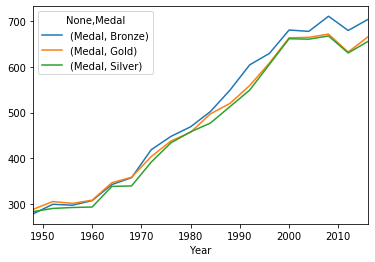

In [4]:
# group summer games by country
grouped_noc = summer_olympics.groupby(["Year"])
grouped_noc

medal_count_summer = grouped_noc["Medal"].value_counts()
medal_count_summer

medal_count_summer_df = pd.DataFrame(medal_count_summer).unstack()
medal_count_summer_df

medal_summer_graph = medal_count_summer_df.plot.line()


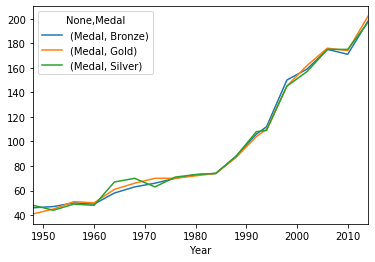

In [6]:
# group winter games by country
grouped_noc = winter_olympics.groupby(["Year"])
grouped_noc

medal_count_winter = grouped_noc["Medal"].value_counts()
medal_count_winter

medal_count_winter_df = pd.DataFrame(medal_count_winter).unstack()
medal_count_winter_df

medal_summer_graph = medal_count_winter_df.plot.line()


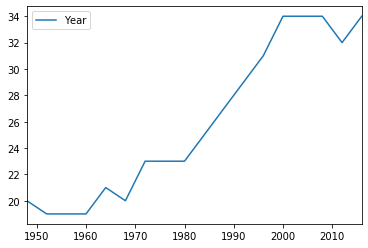

In [20]:
# GROWTH OF SPORTING EVENTS BY SUMMER OLYMPIC GAMES.

# groupt the games by year
grouped_year = summer_olympics.groupby(["Year"])
grouped_year

# group the previously grouped index by sport (year and sport)
sport_count = grouped_year["Sport"].value_counts()
sport_count

# create a dataframe
sport_count_df = pd.DataFrame(sport_count)
sport_count_final = sport_count_df.rename(columns={"Sport": "Athlete Count"})

# reset the index 
sport_count_per_year = sport_count_final.reset_index()
sport_count_per_year
# value count per sport to aggregate sports per year
sport_count = sport_count_per_year["Year"].value_counts()

# create dataframe
sport_count_df = pd.DataFrame(sport_count)

# sort
sport_count_sort = sport_count_df.sort_index()

# plot line graph
sport_line = sport_count_sort.plot.line()


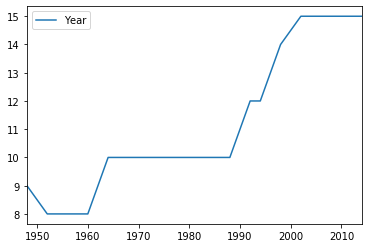

In [21]:
# GROWTH OF SPORTING EVENTS BY WINTER OLYMPIC GAMES.

# groupt the games by year
grouped_year = winter_olympics.groupby(["Year"])
grouped_year

# group the previously grouped index by sport (year and sport)
sport_count = grouped_year["Sport"].value_counts()
sport_count

# create a dataframe
sport_count_df = pd.DataFrame(sport_count)
sport_count_final = sport_count_df.rename(columns={"Sport": "Athlete Count"})

# reset the index 
sport_count_per_year = sport_count_final.reset_index()
sport_count_per_year
# value count per sport to aggregate sports per year
sport_count = sport_count_per_year["Year"].value_counts()

# create dataframe
sport_count_df = pd.DataFrame(sport_count)

# sort
sport_count_sort = sport_count_df.sort_index()

# plot line graph
sport_line = sport_count_sort.plot.line()

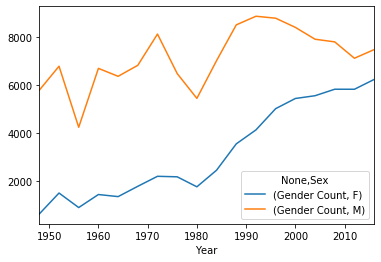

In [78]:
# GENDER RATIO BY SUMMER OLYMPIC GAMES - LINE GRAPH

grouped_year = summer_olympics.groupby(["Year"])
grouped_year

gender_count = grouped_year["Sex"].value_counts()
gender_count

gender_count_df = pd.DataFrame(gender_count).unstack()
gender_count_df

gender_count_rename = gender_count_df.rename(columns={"Sex": "Gender Count"})
gender_count_rename

gender_line_graph = gender_count_rename.plot.line()

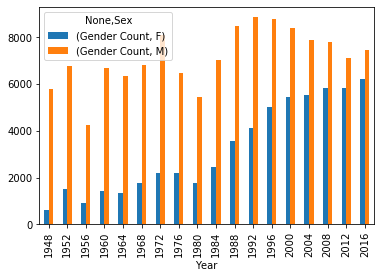

In [80]:
# GENDER RATIO BY SUMMER OLYMPIC GAMES - BAR GRAPH

gender_line_graph = gender_count_rename.plot.bar()

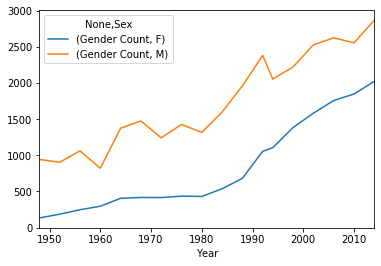

In [82]:
# GENDER RATIO BY WINTER OLYMPIC GAMES - LINE GRAPH

grouped_year = winter_olympics.groupby(["Year"])
grouped_year

gender_count = grouped_year["Sex"].value_counts()
gender_count

gender_count_df = pd.DataFrame(gender_count).unstack()
gender_count_df

gender_count_rename = gender_count_df.rename(columns={"Sex": "Gender Count"})
gender_count_rename

gender_line_graph = gender_count_rename.plot.line()

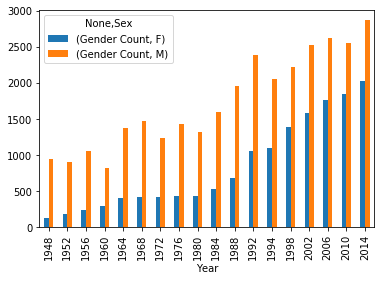

In [84]:
# GENDER RATIO BY WINTER OLYMPIC GAMES - BAR GRAPH

gender_line_graph = gender_count_rename.plot.bar()

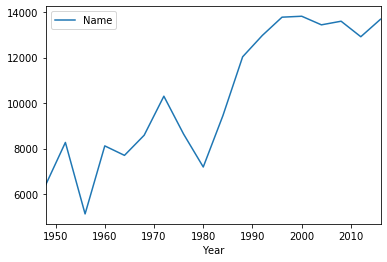

In [104]:
# INCREASE IN TOTAL SUMMER OLYMPIC ATHLETES OVER TIME

# group summer games by year
grouped_year = summer_olympics.groupby(["Year"])

total_athletes_summer = grouped_year["Name"].count()

total_athletes_summer_df = pd.DataFrame(total_athletes_summer)
total_athletes_summer_df

total_athlete_line_graph = total_athletes_summer_df.plot.line()

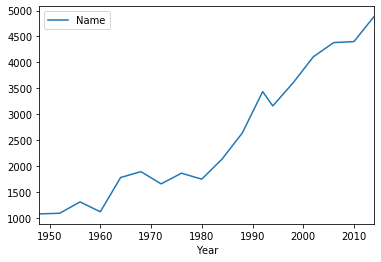

In [111]:
# INCREASE IN TOTAL WINTER OLYMPIC ATHLETES OVER TIME

# group winter games by year
grouped_year = winter_olympics.groupby(["Year"])

total_athletes_winter = grouped_year["Name"].count()

total_athletes_winter_df = pd.DataFrame(total_athletes_winter)
total_athletes_winter_df

total_athlete_line_graph = total_athletes_winter_df.plot.line()

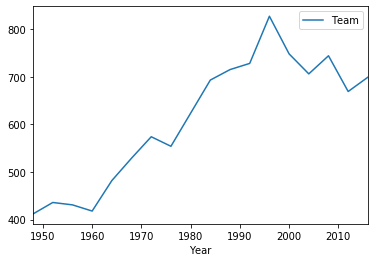

In [137]:
# NUMBER OF us ATHLETES IN SUMMER OLYMPICS

us_only_summer = summer_olympics.loc[summer_olympics['Team'] == 'United States']

athletes_us_df = pd.DataFrame(us_only_summer)
athletes_us_df

group_year = athletes_us_df.groupby(["Year"])
group_year

athlete_us_count = group_year["Team"].count()
athlete_us_count

athlete_us_count_df = pd.DataFrame(athlete_us_count)
athlete_us_count_df

athlete_us_count_line = athlete_us_count_df.plot.line()

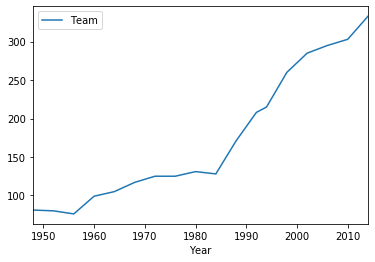

In [218]:
# NUMBER OF us ATHLETES IN WINTER OLYMPICS

us_only_winter = winter_olympics.loc[winter_olympics['Team'] == 'United States']

athletes_us_df = pd.DataFrame(us_only_winter)
athletes_us_df

group_year = athletes_us_df.groupby(["Year"])
group_year

athlete_us_count = group_year["Team"].count()
athlete_us_count

athlete_us_count_df = pd.DataFrame(athlete_us_count)
athlete_us_count_df

athlete_us_count_line = athlete_us_count_df.plot.line()

In [219]:
# CAN WE PREDICT A WINNER BY AGE, HEIGHT, AND WEIGHT OF AN OLYMPIC SPRINTER IN 100 METRE SPRINT

# event: Athletics Men's 100 metres

summer_sprinters = summer_olympics.loc[summer_olympics['Event'] == "Athletics Men's 100 metres"]

summer_sprinters_df = pd.DataFrame(summer_sprinters)
summer_sprinters_df

summer_sprinters_df.drop(columns=['Name', 'ID', 'Sex', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event'])

average_height = summer_sprinters_df["Height"].mean()
median_height = summer_sprinters_df["Height"].median()
average_weight = summer_sprinters_df["Weight"].mean()
median_weight = summer_sprinters_df["Weight"].median()
average_age = summer_sprinters_df["Age"].mean()
median_age = summer_sprinters_df["Age"].median()

print(f"For all sprinters the average height, weight, and age is {average_height, average_weight, average_age}")
print("---------------------------------------------------------")
print(f"For all sprinters the median height, weight, and age is {median_height, median_weight, median_age}")


For all sprinters the average height, weight, and age is (176.98235765838012, 72.35610932475885, 24.142857142857142)
---------------------------------------------------------
For all sprinters the median height, weight, and age is (178.0, 72.0, 24.0)


In [220]:
summer_sprinters = summer_olympics.loc[summer_olympics['Event'] == "Athletics Men's 100 metres"]

summer_sprinters_gold = summer_sprinters.loc[summer_sprinters['Medal'] == "Gold"]
summer_sprinters_gold

summer_sprinters_df = pd.DataFrame(summer_sprinters_gold)
summer_sprinters_df

summer_sprinter_sort = summer_sprinters_df.sort_values(by=['Year'])

final_sprint_df = summer_sprinter_sort.drop(columns=['Name', 'ID', 'Sex', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event'])
final_sprint_df

average_height = final_sprint_df["Height"].mean()
median_height = final_sprint_df["Height"].median()
average_weight = final_sprint_df["Weight"].mean()
median_weight = final_sprint_df["Weight"].median()
average_age = final_sprint_df["Age"].mean()
median_age = final_sprint_df["Age"].median()

print(f"For all sprinters the average height, weight, and age is {average_height, average_weight, average_age}")
print("---------------------------------------------------------")
print(f"For all sprinters the median height, weight, and age is {median_height, median_weight, median_age}")

For all sprinters the average height, weight, and age is (185.33333333333334, 82.55555555555556, 24.5)
---------------------------------------------------------
For all sprinters the median height, weight, and age is (184.5, 80.5, 24.0)


In [233]:
# GOLD SPRINTERS

summer_sprinters = summer_olympics.loc[summer_olympics['Event'] == "Athletics Men's 100 metres"]

summer_sprinters_gold = summer_sprinters.loc[summer_sprinters['Medal'] == "Gold"]

summer_sprinters_gold_df = pd.DataFrame(summer_sprinters_gold)

summer_sprinter_gold_sort = summer_sprinters_gold_df.sort_values(by=['Year'])

final_sprint_gold_df = summer_sprinter_gold_sort.drop(columns=['Name', 'ID', 'Sex', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event'])
final_sprint_gold_df

# SILVER SPRNTERS

summer_sprinters = summer_olympics.loc[summer_olympics['Event'] == "Athletics Men's 100 metres"]

summer_sprinters_silver = summer_sprinters.loc[summer_sprinters['Medal'] == "Silver"]

summer_sprinters_silver_df = pd.DataFrame(summer_sprinters_silver)

summer_sprinter_silver_sort = summer_sprinters_silver_df.sort_values(by=['Year'])

final_sprint_silver_df = summer_sprinter_silver_sort.drop(columns=['Name', 'ID', 'Sex', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event'])
final_sprint_silver_df

# BRONZE SPRINTERS

summer_sprinters = summer_olympics.loc[summer_olympics['Event'] == "Athletics Men's 100 metres"]

summer_sprinters_bronze = summer_sprinters.loc[summer_sprinters['Medal'] == "Bronze"]

summer_sprinters_bronze_df = pd.DataFrame(summer_sprinters_bronze)

summer_sprinter_bronze_sort = summer_sprinters_bronze_df.sort_values(by=['Year'])

final_sprint_bronze_df = summer_sprinter_bronze_sort.drop(columns=['Name', 'ID', 'Sex', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event'])
final_sprint_bronze_df

# AVERAGE HEIGHT AND WEIGHT

# MEDIAN HEIGHT AND WEIGHT

,Age,Height,Weight,Team,Year,Medal
130419,26.0,185.0,73.0,Panama,1948,Bronze
12684,31.0,180.0,65.0,Great Britain,1952,Bronze
97236,25.0,170.0,65.0,Australia,1956,Bronze
195494,20.0,180.0,61.0,Great Britain,1960,Bronze
108115,24.0,180.0,77.0,Canada,1964,Bronze
83939,23.0,173.0,69.0,United States,1968,Bronze
159220,25.0,183.0,79.0,Jamaica,1972,Bronze
26264,26.0,183.0,80.0,Soviet Union,1976,Bronze
187258,25.0,180.0,80.0,Bulgaria,1980,Bronze
109444,22.0,177.0,75.0,Canada,1984,Bronze


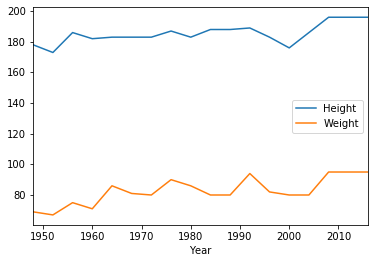

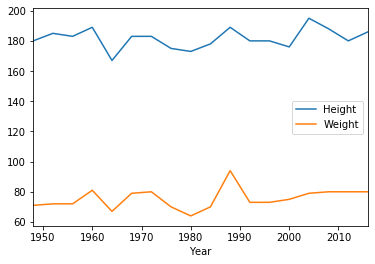

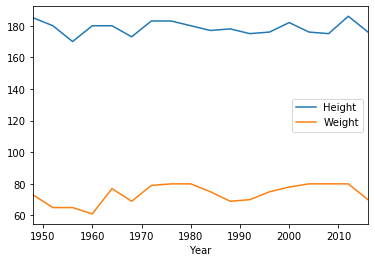

In [234]:
final_sprint_gold_df.plot(x="Year", y=["Height", "Weight"])
final_sprint_silver_df.plot(x="Year", y=["Height", "Weight"])
final_sprint_bronze_df.plot(x="Year", y=["Height", "Weight"])

plt.show()